<a href="https://www.kaggle.com/ingenio/pkm-22?scriptVersionId=89079360" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt #plotting data
import seaborn as sns 
sns.set(color_codes=True)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pkm22/chicken_dataset.csv


In [2]:
df = pd.read_csv("../input/pkm22/chicken_dataset.csv")
df.describe()

,Age(wk),Sex,Weight
count,22.000000,22.000000,22.000000
mean,10.000000,0.500000,507.482273
std,6.473389,0.511766,363.525723
min,0.000000,0.000000,33.960000
25%,4.500000,0.000000,182.635000
50%,10.000000,0.500000,470.105000
75%,15.500000,1.000000,737.650000
max,20.000000,1.000000,1237.900000


<AxesSubplot:xlabel='Age(wk)', ylabel='Weight'>

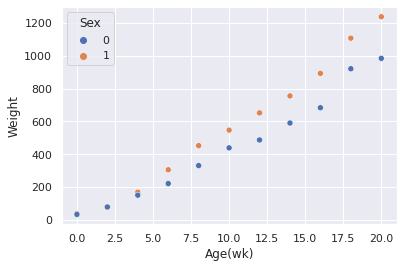

In [3]:
#plot data
sns.scatterplot(x='Age(wk)',y='Weight', hue="Sex", data=df)

In [4]:
#split data for train and validation
from sklearn.model_selection import train_test_split

y = df.Weight
features = ['Age(wk)', "Sex"]
X = df[features]

train_X, val_X, train_y, val_y = train_test_split(X, y, random_state=420, test_size=0.2)

In [5]:
#test linear model
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error

linear =  LinearRegression()
linear.fit(train_X, train_y)
ridge = Ridge()
ridge.fit(train_X, train_y)
lasso = Lasso()
lasso.fit(train_X, train_y)
elastic_net = ElasticNet(alpha = 0.1)
elastic_net.fit(train_X, train_y)

ElasticNet(alpha=0.1)

In [6]:
#test non-linear model
from sklearn.svm import SVR

svr_rbf = SVR(kernel="rbf", C=100, gamma=0.1, epsilon=0.1)
svr_rbf.fit(train_X, train_y)
svr_poly = SVR(kernel="poly", C=100, gamma="scale", degree=3, epsilon=0.1, coef0=1)
svr_poly.fit(train_X, train_y)
svr_sig = SVR(kernel="sigmoid", gamma="scale", coef0=0.01)
svr_sig.fit(train_X, train_y)

SVR(coef0=0.01, kernel='sigmoid')

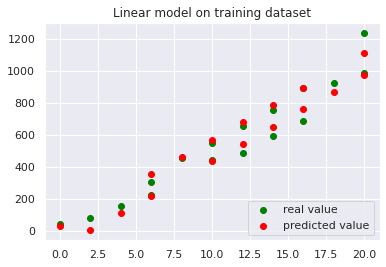

Accuracy on train data: 0.976


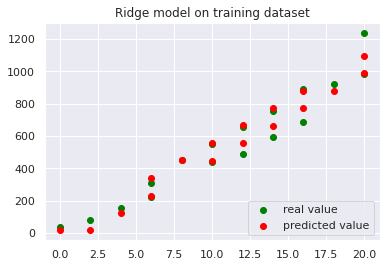

Accuracy on train data: 0.974


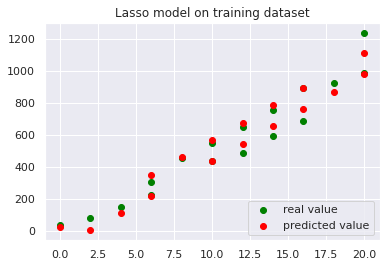

Accuracy on train data: 0.976


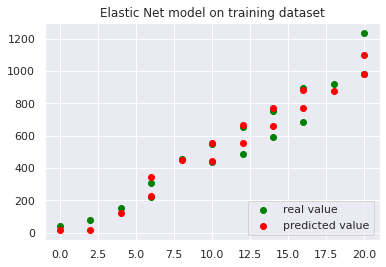

Accuracy on train data: 0.975


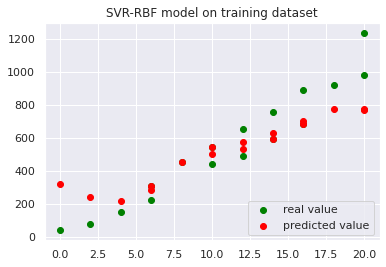

Accuracy on train data: 0.746


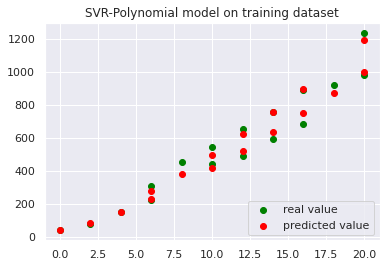

Accuracy on train data: 0.988


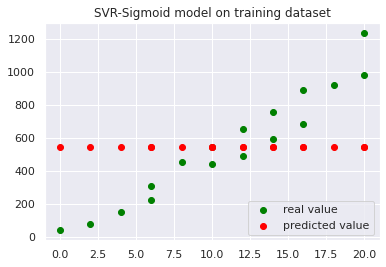

Accuracy on train data: -0.000


In [7]:
#plot all result
df = pd.read_csv("../input/pkm22/chicken_dataset.csv")

models = [
        linear, 
        ridge,
        lasso,
        elastic_net,
        svr_rbf,
        svr_poly,
        svr_sig,]

label = [
        "Linear", 
        "Ridge", 
        "Lasso",
        "Elastic Net",
        "SVR-RBF",
        "SVR-Polynomial",
        "SVR-Sigmoid",]

for idx, model in enumerate(models):
    plt.scatter(train_X["Age(wk)"], train_y, color="green")
    plt.scatter(train_X["Age(wk)"], model.predict(train_X), color="red")
    plt.title(f"{label[idx]} model on training dataset")
    plt.legend(["real value", "predicted value"], loc ="lower right")
    plt.show()
    print("Accuracy on train data: {:.3f}".format(model.score(train_X, train_y)))
    

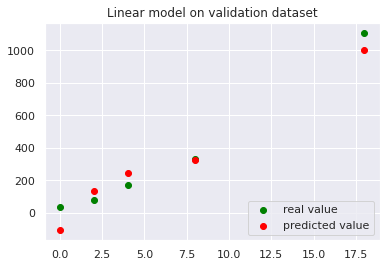

Accuracy on validation data: 0.949
Validation MAE: 76.524


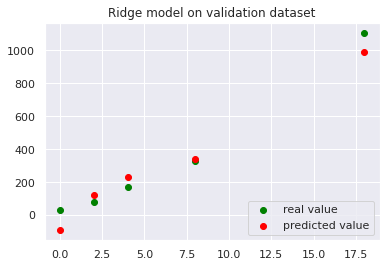

Accuracy on validation data: 0.953
Validation MAE: 72.309


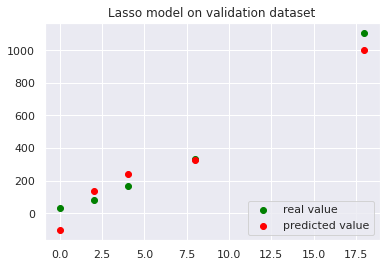

Accuracy on validation data: 0.950
Validation MAE: 75.417


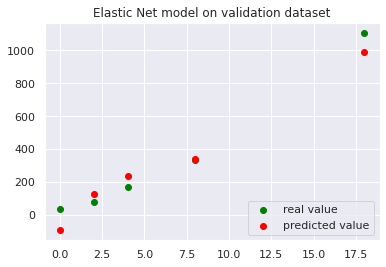

Accuracy on validation data: 0.953
Validation MAE: 72.560


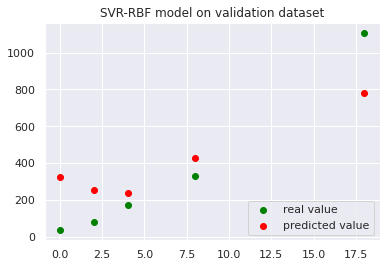

Accuracy on validation data: 0.698
Validation MAE: 190.496


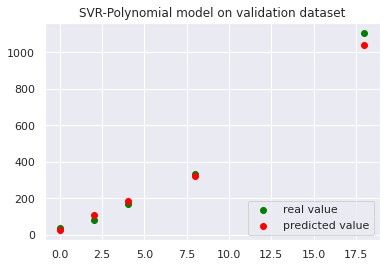

Accuracy on validation data: 0.993
Validation MAE: 25.753


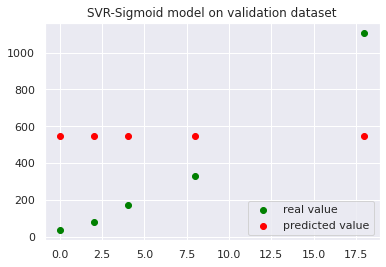

Accuracy on validation data: -0.259
Validation MAE: 426.193


In [8]:
for idx, model in enumerate(models):
    plt.scatter(val_X["Age(wk)"], val_y, color="green")
    plt.scatter(val_X["Age(wk)"], model.predict(val_X), color="red")
    plt.title(f"{label[idx]} model on validation dataset")
    plt.legend(["real value", "predicted value"], loc ="lower right")
    plt.show()
    print("Accuracy on validation data: {:.3f}".format(model.score(val_X, val_y)))
    print("Validation MAE: {:.3f}".format(mean_absolute_error(model.predict(val_X), val_y)))

In [9]:
#gompertz model? in progress
def Gompertz(t, theta1, theta2, theta3):
    '''
    theta1: The asymptote.
    theta2: The displacement along the x-axis.
    theta3: The growth rate.
    '''
    f = theta1 * np.exp(-theta2 * np.exp(-theta3 * t))
    return f